In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5 Generate Random World Cities
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# 6.2.6 Get the City Weather Data
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    


Beginning Data Retrieval     
-----------------------------


In [7]:
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | baykit
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | yabelo
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mashhad
Processing Record 8 of Set 1 | alappuzha
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | atar
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | namatanai
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | jacareacanga
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 23 of Set 1 | kapaa
Processing Rec

Processing Record 37 of Set 4 | the pas
Processing Record 38 of Set 4 | eyrarbakki
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | shu
Processing Record 44 of Set 4 | puro
Processing Record 45 of Set 4 | rockland
Processing Record 46 of Set 4 | narrabri
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | kumluca
Processing Record 49 of Set 4 | vanersborg
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | ahuimanu
Processing Record 3 of Set 5 | bagado
Processing Record 4 of Set 5 | poum
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of Set 5 | luau
Processing Record 7 of Set 5 | yomitan
City not found. Skipping...
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | boyuibe
Processing Record 10 of 

Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | waipawa
Processing Record 28 of Set 8 | pousat
City not found. Skipping...
Processing Record 29 of Set 8 | nalut
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 32 of Set 8 | caconda
Processing Record 33 of Set 8 | elat
Processing Record 34 of Set 8 | hohhot
Processing Record 35 of Set 8 | necochea
Processing Record 36 of Set 8 | manta
Processing Record 37 of Set 8 | mamlyutka
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | nyrob
Processing Record 40 of Set 8 | fonte boa
Processing Record 41 of Set 8 | pozo colorado
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | xichang
Processing Record 44 of Set 8 | penzance
Processing Record 45 of Set 8 | goya
Processing Record 46 of Set 8 | kwinana
Processing Record 47 of Set 8 | brewster
Processing Record 48 

Processing Record 13 of Set 12 | bonavista
Processing Record 14 of Set 12 | mopipi
Processing Record 15 of Set 12 | samarai
Processing Record 16 of Set 12 | olinda
Processing Record 17 of Set 12 | caramay
Processing Record 18 of Set 12 | tripoli
Processing Record 19 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 20 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 21 of Set 12 | taywarah
Processing Record 22 of Set 12 | nisko
Processing Record 23 of Set 12 | fort nelson
Processing Record 24 of Set 12 | green valley
Processing Record 25 of Set 12 | los santos
Processing Record 26 of Set 12 | ratnagiri
Processing Record 27 of Set 12 | correntina
Processing Record 28 of Set 12 | khandyga
Processing Record 29 of Set 12 | rawson
Processing Record 30 of Set 12 | enshi
Processing Record 31 of Set 12 | bilma
Processing Record 32 of Set 12 | sulina
Processing Record 33 of Set 12 | kamenka
Processing Record 34 of Set 12 | akcaabat
Processing Record 35 of

In [8]:
len(city_data)

568

In [9]:
# 6.2.7 Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baykit,61.6700,96.3700,35.06,98,100,4.14,RU,2021-04-06 03:41:04
1,Ushuaia,-54.8000,-68.3000,42.80,61,0,4.61,AR,2021-04-06 03:41:04
2,Cape Town,-33.9258,18.4232,61.00,82,0,4.61,ZA,2021-04-06 03:38:37
3,Yabelo,4.8833,38.0833,59.20,85,99,4.32,ET,2021-04-06 03:41:05
4,Busselton,-33.6500,115.3333,77.00,60,11,1.01,AU,2021-04-06 03:41:05
5,Mashhad,36.2970,59.6062,51.80,62,0,0.63,IR,2021-04-06 03:41:06
6,Alappuzha,9.4900,76.3264,83.70,74,57,3.13,IN,2021-04-06 03:41:06
7,Nikolskoye,59.7035,30.7861,32.00,93,90,6.71,RU,2021-04-06 03:41:06
8,Albany,42.6001,-73.9662,46.40,36,1,11.50,US,2021-04-06 03:36:12
9,Lavrentiya,65.5833,-171.0000,1.80,90,78,8.52,RU,2021-04-06 03:41:07


In [10]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baykit,RU,2021-04-06 03:41:04,61.6700,96.3700,35.06,98,100,4.14
1,Ushuaia,AR,2021-04-06 03:41:04,-54.8000,-68.3000,42.80,61,0,4.61
2,Cape Town,ZA,2021-04-06 03:38:37,-33.9258,18.4232,61.00,82,0,4.61
3,Yabelo,ET,2021-04-06 03:41:05,4.8833,38.0833,59.20,85,99,4.32
4,Busselton,AU,2021-04-06 03:41:05,-33.6500,115.3333,77.00,60,11,1.01
5,Mashhad,IR,2021-04-06 03:41:06,36.2970,59.6062,51.80,62,0,0.63
6,Alappuzha,IN,2021-04-06 03:41:06,9.4900,76.3264,83.70,74,57,3.13
7,Nikolskoye,RU,2021-04-06 03:41:06,59.7035,30.7861,32.00,93,90,6.71
8,Albany,US,2021-04-06 03:36:12,42.6001,-73.9662,46.40,36,1,11.50
9,Lavrentiya,RU,2021-04-06 03:41:07,65.5833,-171.0000,1.80,90,78,8.52


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# 6.3.1 Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

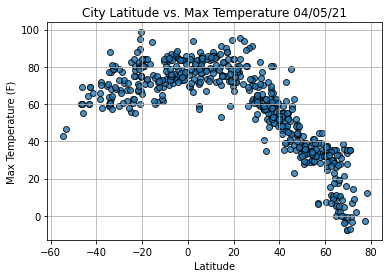

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

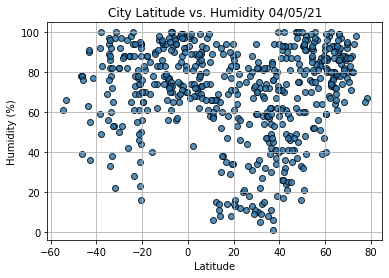

In [14]:
# 6.3.2 Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

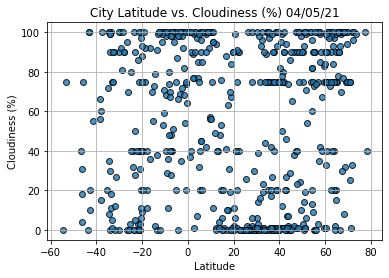

In [15]:
# 6.3.3 Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

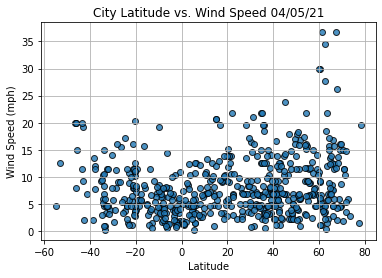

In [16]:
# 6.3.4 Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()